<span style="color:red;font-weight:bold">Jayant Solanki</span>
<br/>
<span style="color:red;font-weight:bold">Anant Gupta</span>
<hr/>
## <span style="float:left">Lab1 Part2</span>
### <span style="float:right">Learning by Repeating Topical Data Analysis</span>
<hr/>

### 1. Influenza national summary (green and yellow chart)

Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (position_stack).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”Warning message:
“Removed 16 rows containing missing values (geom_path).”

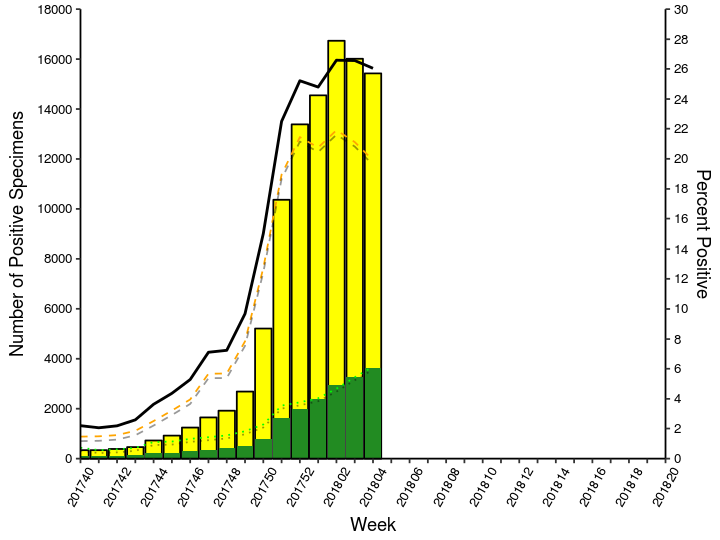

In [671]:
library(ggplot2)
library(repr)
library(reshape2)
library(grid)

options(repr.plot.width=6, repr.plot.height=4.5)
Nationalsummary <- read.csv("../data/National-Summary.csv")
# summary(Nationalsummary)
# Nationalsummary$Week <- as.integer(Nationalsummary$Week)
# Nationalsummary$Week <- factor(Nationalsummary$Week)
Nationalsummary$id = c(1:nrow(Nationalsummary))
# Nationalsummary$X..Positive = Nationalsummary$X..Positive*18000/30
# Nationalsummary$Percent.Positive.A = Nationalsummary$Percent.Positive.A*18000/30
# Nationalsummary$Percent.Positive.B = Nationalsummary$Percent.Positive.B*18000/30
customLabel3 <- function(x){
    vec<-NULL
    count<--1
    for (X in x){
        count<-count+1
        if(count>0){
            vec<-c(vec,"")
            count<--1
        }
        else if(count==0){
            vec<-c(vec,X)
#             index<-index+6
        }
    }
      as.vector(vec)      
}
g = ggplot(Nationalsummary, aes(id))+
    geom_bar(aes(y=Total.B+Total.A),stat = "identity", fill = "yellow", color="black")+
    geom_bar(aes(y=Total.B),stat = "identity", fill = "#228B22")+
    geom_line(aes(y=X..Positive*18000/30, group =1), colour= "black", size=0.8)+
    geom_line(aes(y=Percent.Positive.A*18000/30, group =1), colour= "orange", linetype = 2, size=0.5)+
    geom_line(aes(y=(Percent.Positive.A-0.3)*18000/30, group =1), colour= "black", linetype = 2, size=0.5, alpha="0.4")+
    geom_line(aes(y=Percent.Positive.B*18000/30, group =1), colour= "green", linetype = "dotted", size=0.5)+
    geom_line(aes(y=(Percent.Positive.B-0.2)*18000/30, group =1), colour= "black", linetype = "dotted", size=0.5, alpha="0.4")+

    scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens",sec.axis = sec_axis(~ . * 30 / 18000, name = "Percent Positive", breaks=seq(0,30, by=2)), breaks=seq(0,18000, by=2000))+
    scale_x_continuous(name="Week", expand = c(0,0),breaks=seq(1,33, by=1), labels=customLabel3(Nationalsummary$Week))+
    coord_cartesian(ylim = c(0, 18000), xlim = c(1,33))+
#     scale_fill_manual(labels="A", values = "yellow") +
#     scale_fill_manual(labels="B", values = "#228B22") +
    scale_fill_manual('',values=c("yellow","#228B22"), guide = guide_legend(title = NULL, keywidth=0.1,
                 keyheight=0.1,
                 default.unit="inch"), 
                 labels=c("A", "B"))+
    scale_color_manual('', values=c("black","orange", "green"), guide = guide_legend(title = NULL, keywidth=0.1,
                 keyheight=0.1,
                 default.unit="inch"), 
                 labels=c("Percent Positive", "% Positive Flu A", "% Positive Flu B"))+
    theme_classic()+
    theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
          axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=13, hjust=0.6),
     legend.position = "bottom")
    g
# Nationalsummary$Week <- numeric(as.character(Nationalsummary$Week))
# try number of rows in x axis and for x-discrete show lables=week
# stacked <- melt(Nationalsummary, id.vars = "id", measure.vars=c("Total.A", "Total.B", "X..Positive", "Percent.Positive.A", "Percent.Positive.B"))
# lines <- melt(Nationalsummary, id.vars = "id", measure.vars=c("X..Positive", "Percent.Positive.A", "Percent.Positive.B"))
# fill <- c("yellow", "#228B22", "black","orange","green")
# color1 <- c("black", "black","black","orange","green")
# g <- ggplot(stacked, aes(id, value)) +
# # g <- ggplot(Nationalsummary, aes(x=Week))+
# geom_bar(stat = "identity", aes(color=variable, fill = variable, size=variable))+
# geom_line(aes(color=variable, size=variable, group=variable, linetype=variable))+    

# labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
# coord_cartesian(ylim = c(0, 18000), xlim = c(1,33))+
# theme_classic()+
# scale_size_manual(values=c(1,1,0.8, 0.8,0.8), guide=FALSE)+
# scale_fill_manual(values=fill, guide = guide_legend(title = NULL, keywidth=0.1,
#                  keyheight=0.1,
#                  default.unit="inch"), 
#                  labels=c("A", "B", "Percent Positive","% Positive Flu A","% Positive Flu B"))+
# scale_color_manual(values=color1, guide=FALSE)+
# scale_linetype_manual(values=c("solid","solid","solid", "dashed", "dotted"), guide=FALSE)+
# theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
#         axis.text.y = element_text( color="black",size=8),
#        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
#        axis.line = element_line(colour = "black"),
#      plot.title = element_text(size=13, hjust=0.6),
#      legend.position = "bottom")
# g



### 2. Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories

Warning message:
“Ignoring unknown parameters: stat”Warning message:
“Removed 112 rows containing missing values (position_stack).”

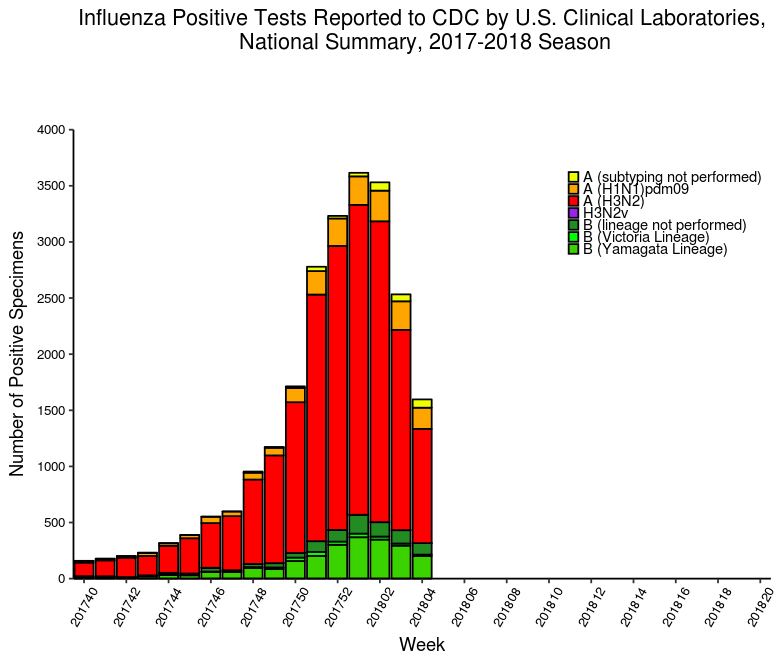

In [641]:
library(ggplot2)
library(repr)
library(reshape2)
options(repr.plot.width=6.5, repr.plot.height=5.5)
positiveTest <- read.csv("../data/positive1.csv")
# summary(positiveTest)
# positiveTest$Week <- c(positiveTest$Week, 201804:201820)
positiveTest$Week <- factor(positiveTest$Week)
# positiveTest$Week <- as.numeric(positiveTest$Week)
stacked <- melt(positiveTest, id.vars = "Week", measure.vars=c("ASNP","AH1N1pdm09", "AH3", "AH3N2v", "B", "BVIC", "BYAM"))
# stacked
# positiveTest$Week <- numeric(as.character(positiveTest$Week))
fill <- c("#eeff00", "orange", "red","purple","#228B22","green","#3bd300")
pos <- ggplot(stacked, aes(Week, value, fill = variable)) +
    geom_bar(stat = "identity", color="black") +
    scale_y_continuous(expand = c(0,0),name="Number of Positive Specimens", breaks=seq(0,4000, by=500))+
scale_x_discrete(expand = c(0,0.5), breaks=seq(201740,201820, by=2))+
coord_cartesian(ylim = c(0, 4000))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL, keywidth=0.1,
                 keyheight=0.1,
                 default.unit="inch"), 
                 labels=c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)","B (Victoria Lineage)","B (Yamagata Lineage)"))+
# scale_color_manual(values="black")+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n National Summary, 2017-2018 Season\n\n\n")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, angle=60, vjust=0.5),
        axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=13, hjust=0.5),
#       legend.direction = 'vertical',
#       legend.key = element_rect(colour = 'white', fill = 'black', size = 0.5),
#       legend.key.size = unit(0.4, 'lines'),
#       legend.key.size = unit(0.2, "cm"),
      legend.justification=c(1,0), legend.position=c(1,0.7))
pos

### 2. Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories

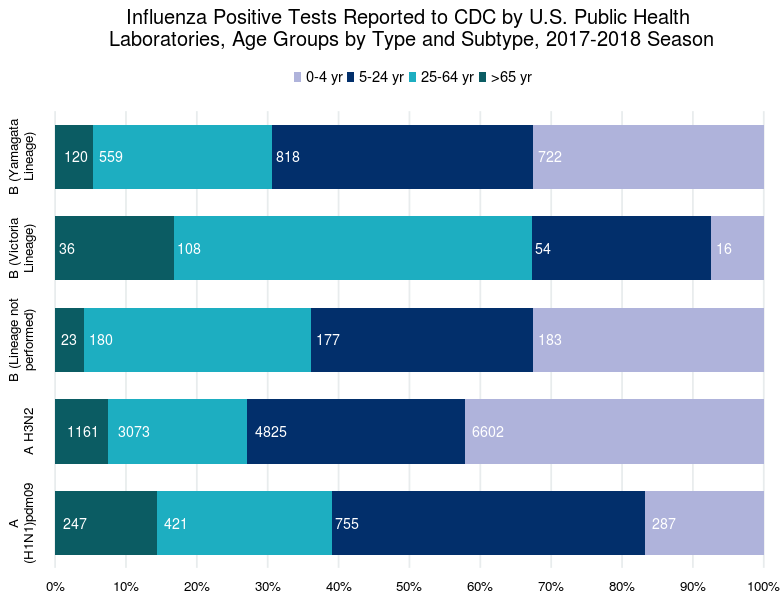

In [673]:
library(ggplot2)
library(reshape2)
# library(scales)
library(repr)
options(repr.plot.width=6.5, repr.plot.height=5)
positiveTest <- read.csv("../data/VirusViewBySeason.csv")
# summary(positiveTest)
stacked <- melt(positiveTest, id.vars = "Virus", measure.vars=c("X.65.yr", "X25.64.yr","X5.24.yr", "X0.4.yr" ))
# stacked
fill <- c("#afb3db", "#022f6b", "#1daec1","#0b5c63")
pos <- ggplot(stacked, aes(Virus, value, fill = variable)) +
    geom_hline(yintercept=seq(0,1,by=0.1), color="#e8eced")+
    geom_bar(color="NA", position = "fill",stat = "identity", width=0.7) +
    geom_text(position = position_fill(vjust=-0.02), aes(x = Virus, y = value,label = value), colour = "white", size=3, hjust=-0.4)+
    scale_y_continuous(name=NULL,expand = c(0,0.01),breaks=seq(0,1, by=0.1),labels = percent_format())+
scale_x_discrete(name=NULL, expand = c(0,0.5),labels=c("A\n(H1N1)pdm09", "\nA H3N2", "B (Lineage not\nperformed)", "B (Victoria\nLineage)","B (Yamagata\nLineage)" ))+
# coord_cartesian(ylim = c(0, 1))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL),
                 labels=c("0-4 yr", "5-24 yr", "25-64 yr", ">65 yr"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health\n Laboratories, Age Groups by Type and Subtype, 2017-2018 Season")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, vjust=0.5),
        axis.text.y = element_text( color="black",size=8, angle=90, hjust=0.5),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "white"),
     plot.title = element_text(size=12, hjust=0.5),
      axis.ticks.length=unit(0.2, "cm"),
      axis.ticks = element_line(colour = "white", size = 0.5),
#       legend.direction = 'vertical',
#       legend.key = element_rect(colour = 'white', fill = 'white', size = 1),
      legend.key.size = unit(0.2, "cm"),
      legend.position="top")+
coord_flip()
pos

### 5. Pneumonia and Influenza (P&I) Mortality Surveillance:

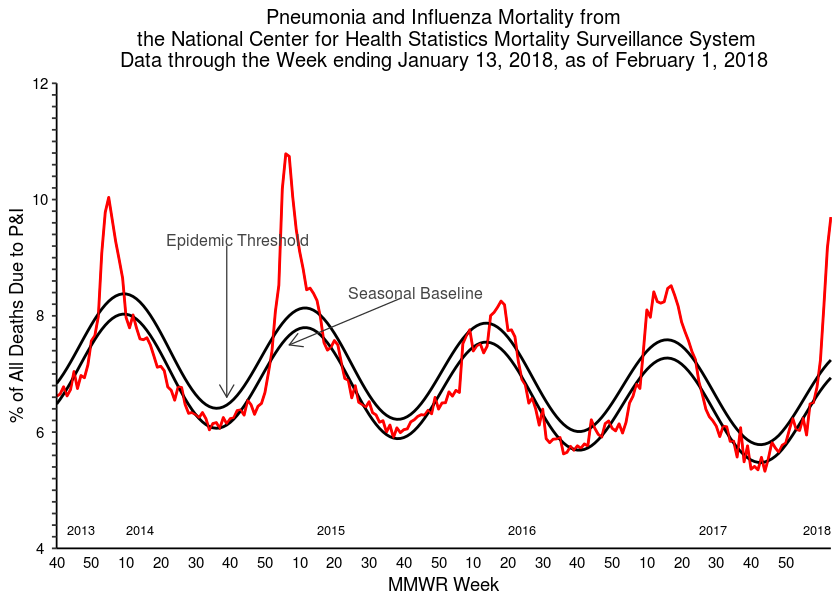

In [672]:
library(ggplot2)
#library(reshape2)
#library(scales)
#library(gtable)
library(repr)
#library(lubridate)
#library(scales)   # to access breaks/formatting functions
#library(gridExtra) # for arranging plots
#library(grid) # for grid
options(repr.plot.width=7, repr.plot.height=5)
PImortality <- read.csv("../data/NCHSData04.csv")
# summary(PImortality)
# stacked <- melt(PImortality, id.vars = "Week", measure.vars=c("PIPercent", "Expected" ))

# labs(title="Pneumonia and Influenza Mortality from\n the National Center for Health Statistics Mortality Surveillance System")+
# theme_classic()+
# theme(axis.text.x = element_text( color="black",size=8, vjust=0.5),
#         axis.text.y = element_text( color="black",size=8, angle=0, hjust=0.5),
#        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
#      plot.title = element_text(size=12, hjust=0.5),
#       axis.ticks.length=unit(0.2, "cm"))
# nrow(PImortality)
# Rows <- c(40:52)
# lubridate::week(ymd("2014", "2015"))
# pos
# method for adding custom label
customLabel <- function(x){
    vec<-NULL
    for (X in x){
        if(X%%2!=0)
            vec<-c(vec,"")
        else
            vec<-c(vec,as.integer(X))
        vec
    }
      as.vector(vec)      
}

label.major <- seq(40,50, by=10)
label.major<-c(label.major, rep(seq(10,50, by=10),4))
pos <- ggplot(PImortality, aes(c(1:nrow(PImortality)), PIPercent)) +
geom_line(na.rm=TRUE, color="red", , size=0.8)+ 
geom_line(aes(y=Expected), color="black", size=0.8)+
geom_line(aes(y=Threshold), color="black", , size=0.8)+
# scale_x_date(limits=c(as.Date(paste(2013, 40, 1, sep="-"), "%Y-%U-%u"), as.Date(paste(2018, 10, 1, sep="-"), "%Y-%U-%u")), expand = c(0,0), labels = date_format("%W"), breaks = date_breaks("10 week"))+
# pos <- ggplot(PImortality, aes(x = interaction(Year, Week, lex.order = TRUE), 
#                             y = PIPercent, group = 1)) +
geom_line(colour = "Red") +
scale_y_continuous(name="% of All Deaths Due to P&I",expand = c(0,0.01),breaks = seq(4,12,by=0.2), labels=customLabel(seq(4,12,by=0.2)))+
scale_x_continuous(name="MMWR Week",expand = c(0,0.01), breaks = seq(1,nrow(PImortality)-4,by=10), labels=factor(label.major))+
coord_cartesian(ylim = c(4, 12), expand = FALSE)+
labs(title="Pneumonia and Influenza Mortality from\n the National Center for Health Statistics Mortality Surveillance System\nData through the Week ending January 13, 2018, as of February 1, 2018")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=9, vjust=0.9),
        axis.text.y = element_text( color="black",size=9, angle=0, hjust=0.5),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
     plot.title = element_text(size=12, hjust=0.5),
      axis.ticks.length=unit(0.1, "cm"),
     axis.ticks.x=element_blank())+
annotate(geom = "text", x = 8 + 10 * (0), y = 4.3, label = "2013", size = 2.7)+
annotate(geom = "text", x = 25 + 55 * (0:3), y = 4.3, label = c("2014","2015","2016","2017"), size = 2.7)+
annotate(geom = "text", x = 220, y = 4.3, label = "2018", size = 2.7)
# Add text in the bottom right corner outside the plotting area
#adapted from stackoverflow, https://stackoverflow.com/questions/45679394/add-an-arrow-pointing-at-the-x-axis-in-my-plot-in-ggplot2
pos <- pos + annotation_custom(
  grob = grid::textGrob(label = "Epidemic Threshold", hjust=0, gp=gpar(col="#444444", cex=0.8)),
  xmin = 15, xmax = 50, ymin =9.3, ymax = 9.3
) 
# Add an arrow depicting the Threshold
pos <- pos + annotation_custom(
  grob = linesGrob(arrow=arrow(type="open", ends="first", length=unit(3,"mm")), gp=gpar(col="#333333", lwd=1)), 
  xmin = 50, xmax = 50, ymin = 6.6, ymax = 9.2
) 
pos <- pos + annotation_custom(
  grob = grid::textGrob(label = "Seasonal Baseline", hjust=0, gp=gpar(col="#444444", cex=0.8)),
  xmin = 70, xmax = 100, ymin =8.4, ymax = 8.4
) 
# Add an arrow depicting the Expected
pos <- pos + annotation_custom(
  grob = linesGrob(arrow=arrow(type="open", ends="first", length=unit(3,"mm")), gp=gpar(col="#333333", lwd=1)), 
  xmin = 68, xmax = 100, ymin = 7.5, ymax = 8.3
) 

pos

### 6. Influenza-Associated Pediatric Mortality:

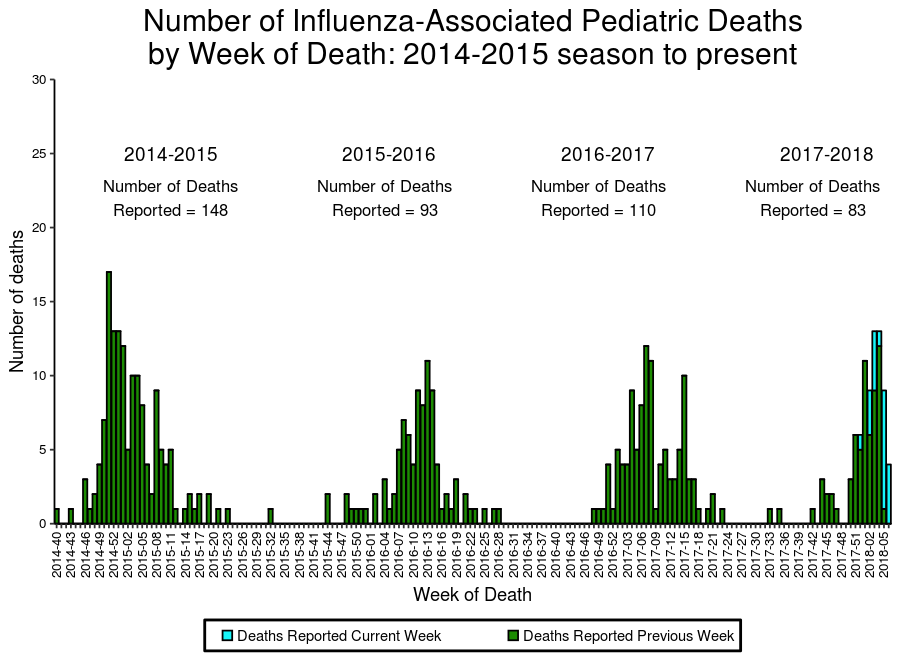

In [441]:
library(ggplot2)
library(repr)
library(reshape2)
options(repr.plot.width=7.5, repr.plot.height=5.5)
pedDeath <- read.csv("../data/PedFluDeath_WeeklyData.csv")
# method for adding custom label
# summary(pedDeath)
customLabel2 <- function(x){
    vec<-NULL
    count<--1
    for (X in x){
        count<-count+1
        if(count==1)
            vec<-c(vec,"")
        else if(count==2){
            vec<-c(vec,"")
            count<--1
        }
        else{
            vec<-c(vec,X)
#             index<-index+6
        }
    }
      as.vector(vec)      
}
# c(as.Date(paste(2014, 40, 1, sep="-"), "%Y-%U-%u"), as.Date(paste(2018, 04, 1, sep="-"), "%Y-%U-%u"))
stacked <- melt(pedDeath, id.vars = "WEEK.NUMBER", measure.vars=c("CURRENT.WEEK.DEATHS", "PREVIOUS.WEEKS.DEATHS"))
fill <- c("#16f6f9", "#1c8c02")
pos <- ggplot(stacked, aes(WEEK.NUMBER, value, fill = variable)) +
    geom_bar(stat = "identity", color="black") +
    scale_y_continuous(expand = c(0,0),name="Number of deaths", breaks=seq(0,30, by=5))+
# scale_x_discrete(name="Week of Death",expand = c(0,0.01),labels = c(pedDeath$WEEK.NUMBER[1],pedDeath$WEEK.NUMBER[nrow(pedDeath)]))+
scale_x_discrete(name="Week of Death",expand = c(0,0.01), labels = customLabel2(pedDeath$WEEK.NUMBER))+
        coord_cartesian(ylim = c(0,30))+
scale_fill_manual(values=fill, guide = guide_legend(title = NULL, keywidth=0.1,
                 keyheight=0.1,
                 default.unit="inch"), 
                 labels=c("Deaths Reported Current Week\t\t\t", "Deaths Reported Previous Week"))+
annotate(geom = "text", x = 25 + 46 * (0:3), y = 25, label = c("2014-2015","2015-2016","2016-2017","2017-2018"), size = 4)+
annotate(geom = "text", x = 25 + 45 * (0:3), y = 22, label = c("Number of Deaths\nReported = 148","Number of Deaths\nReported = 93","Number of Deaths\nReported = 110","Number of Deaths\nReported = 83"), size = 3.5)+

        # scale_color_manual(values="black")+
labs(title="Number of Influenza-Associated Pediatric Deaths\nby Week of Death: 2014-2015 season to present")+
theme_classic()+
theme(axis.text.x = element_text( color="black",size=8, angle=90, vjust=0.5),
        axis.text.y = element_text( color="black",size=8),
       panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
       axis.line = element_line(colour = "black"),
     plot.title = element_text(size=18, hjust=0.5),
      legend.background = element_rect(color="black", size=0.8),
      legend.position="bottom")
pos

### 7. ILINet State Activity Indicator Map::(Flu heat map of USA)

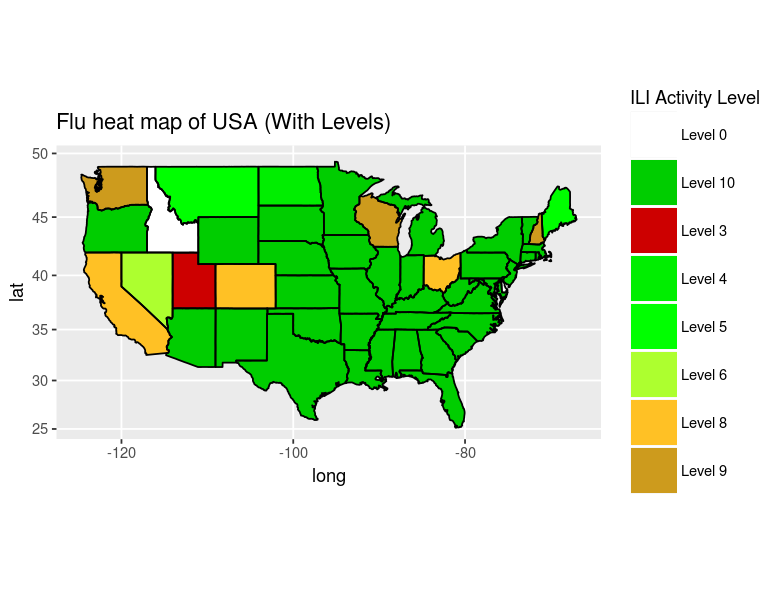

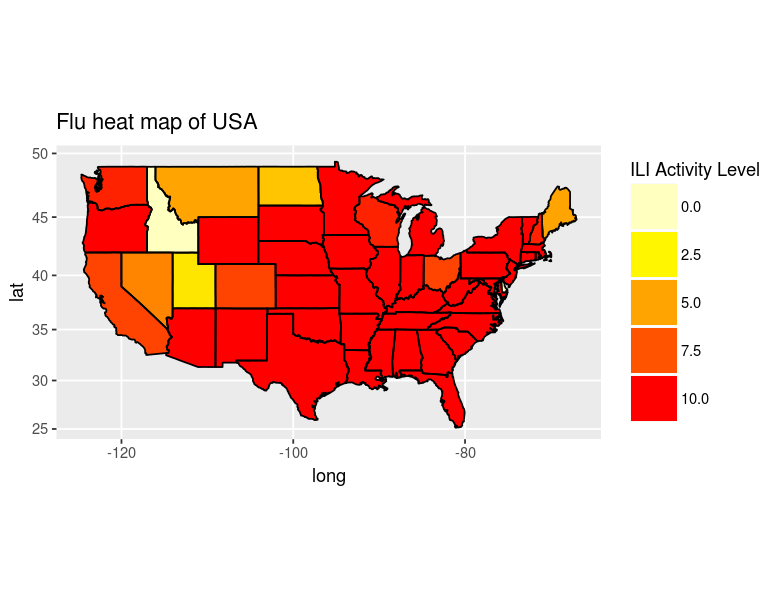

In [690]:
library(maptools)
library(mapdata)
library(maps)
library('ggmap')
library(ggplot2)
plot <- read.csv("../data/StateDatabyWeekforMap_2017-18week4-4.csv")
plot <- data.frame(plot$STATENAME,plot$ACTIVITY.LEVEL,plot$Level)
plot$region <- tolower(plot$plot.STATENAME)
states <- map_data("state")
map.df <- merge(states,plot, by="region", all.plot=T)
map.df <- map.df[order(map.df$order),]

ggplot(map.df, aes(x=long,y=lat,group=group))+ ggtitle("Flu heat map of USA (With Levels)")+
     geom_polygon(aes(fill=plot.ACTIVITY.LEVEL))+
     geom_path()+ 
     scale_fill_manual(guide = guide_legend(title = "ILI Activity Level", keywidth=0.4,
                 keyheight=0.4,
                 default.unit="inch"),
                       values = c('white', 'green3','red3','green2','green1',
                                  'greenyellow','goldenrod1',
                                  'goldenrod3', 'darkorange3','red1','red2'))+
     coord_map()
# install.packages("mapdata", "/home/jayant/anaconda3/lib/R/library/", repos='http://cran.us.r-project.org')
###########################################Second Part####################################
ggplot(map.df, aes(x=long,y=lat,group=group))+ ggtitle("Flu heat map of USA ")+
     geom_polygon(aes(fill=plot.Level))+
     geom_path()+ 
     scale_fill_gradientn(guide = guide_legend(title = "ILI Activity Level", keywidth=0.4,
                 keyheight=0.4,
                 default.unit="inch"),
                          colours=rev(heat.colors(10)),na.value="grey90")+
     coord_map()